# Statistics Figure Panels

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../')
from score.density_estimate import DensityEstimate
from shared_paths import proteins, shared_paths, feature_defs
from score.statistics import statistics
import os
from glob import glob
%matplotlib inline

In [14]:
stats = statistics([protein for protein in proteins if protein not in {'D2', 'CHRM3', 'DHFR'}], feature_defs.keys())

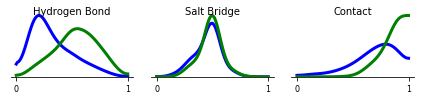

In [15]:
names = {
    'hbond'  : 'Hydrogen Bond',
    'sb'     : 'Salt Bridge',
    'contact': 'Contact',
    'mcss'   : 'MCSS',
}

f, ax = plt.subplots(1, 3, figsize = (6, 1.5))
for i, interaction in enumerate(['hbond', 'sb', 'contact']):
    ref = stats['reference'][interaction]
    nat = stats['native'][interaction]
    
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    
    ax[i].plot(ref.x, ref.fx, c = 'b', lw = 3)
    ax[i].plot(nat.x, nat.fx, c = 'g', lw = 3)
    ax[i].set_title(names[interaction], fontsize = 10, fontdict = {'verticalalignment': 'top'})
    ax[i].set_xticks([0, 1])
    ax[i].set_xticklabels([0, 1], fontsize = 8)
    ax[i].set_yticks([])
    ax[i].set_ylim(0)
#plt.subplots_adjust(wspace = 0.1, top = 0.1, bottom = 0.0, left = 0.1, right = 0.9)
plt.tight_layout()
#plt.savefig('../../pymol/figures/fig2_panels/interaction_similarities.pdf')
plt.show()

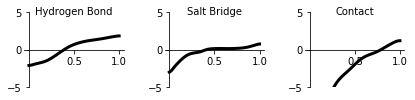

In [16]:
names = {
    'hbond'  : 'Hydrogen Bond',
    'sb'     : 'Salt Bridge',
    'contact': 'Contact',
    'mcss'   : 'MCSS',
}

f, ax = plt.subplots(1, 3, figsize = (6, 1.5))
for i, interaction in enumerate(['hbond', 'sb', 'contact']):
    ref = stats['reference'][interaction]
    nat = stats['native'][interaction]
    
    ax[i].spines['left'].set_position('zero')
    ax[i].spines['bottom'].set_position('zero')
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].plot(nat.x, np.log(nat.fx/ref.fx), c = 'k', lw = 3)
    ax[i].set_title(names[interaction], fontsize = 10, fontdict = {'verticalalignment': 'top'})
    ax[i].set_ylim(-5, 5)
    ax[i].set_xticks([0.5, 1])

plt.tight_layout()
#plt.savefig('../../pymol/figures/fig2_panels/interaction_similarities.pdf')
plt.show()

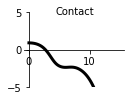

In [11]:
# The spacing at edges of figure is slightly bigger than the spacing
# between panels in the above. The result is that we need to make
# a 5% wider figure than you would expect by simple division to get
# figures that are exactlty the same dimension.

f, ax = plt.subplots(1, 1, figsize = (2*1.05, 1.5))
ref = stats['reference']['mcss']
nat = stats['native']['mcss']

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.plot(nat.x, np.log(nat.fx/ref.fx), c = 'k', lw = 3)
ax.set_title(names[interaction], fontsize = 10, fontdict = {'verticalalignment': 'top'})
ax.set_ylim(-5, 5)

plt.tight_layout()
plt.show()

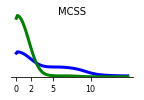

In [12]:

f, ax = plt.subplots(1, 1, figsize = (2*1.05, 1.5))
ref = stats['reference']['mcss']
nat = stats['native']['mcss']

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.plot(ref.x, ref.fx, c = 'b', lw = 3)
ax.plot(nat.x, nat.fx, c = 'g', lw = 3)
ax.set_title(names['mcss'], fontsize = 10, fontdict = {'verticalalignment': 'top'})
ax.set_xticks([0, 2, 5, 10])
ax.set_xticklabels([0, 2, 5, 10], fontsize = 8)
ax.set_yticks([])
ax.set_ylim(0)

plt.tight_layout()
plt.show()

In [ ]:
for interaction in feature_defs:
    if interaction not in names: continue
    
    fig, ax = plt.subplots(7, 5, figsize = (10, 8), dpi = 300, sharex=True, sharey=True)
    m = 0
    n = -1
    for protein in proteins:
        if protein in ['D2', 'CHRM3','DHFR', 'A2AR-expanded-grid']: continue
        n += 1
        i = n % 7
        j = int(n / 7)
        shared_paths['stats']['version'] = 'stats12'
        if not glob('{}/{}/stats/{}/{}-{}-reference.de'.format(shared_paths['data'], protein,
                                                           'stats18',
                                                                     protein,
                                                            interaction)): continue
#         for fname in glob('{}/{}/stats/{}/*-{}-reference.de'.format(shared_paths['data'], protein,
#                                                                       shared_paths['stats']['version'],
#                                                                       interaction)):
            
#             ref = DensityEstimate.read(fname)
#             nat = DensityEstimate.read(fname.replace('reference', 'native'))
#             if nat.n_samples:
#                 ax[i, j].plot(nat.x, nat.fx, c = 'g', alpha = 0.05, lw=1)
#                 ax[i, j].plot(ref.x, ref.fx, c = 'b', alpha = 0.05, lw=1)
#             m = max(m, ref.fx.max(), nat.fx.max())
            
        fname = '{}/{}/stats/{}/{}-{}-reference.de'.format(shared_paths['data'], protein,
                                                            'stats18',
                                                            protein, interaction)
        ref = DensityEstimate.read(fname)
        nat = DensityEstimate.read(fname.replace('reference', 'native'))
        
        m = max(m, ref.fx.max(), nat.fx.max())
        
        ax[i, j].set_title(protein, va = 'top')
        
        if nat.n_samples:
            ax[i, j].plot(ref.x, ref.fx, c = 'b', lw = 3)
            ax[i, j].plot(nat.x, nat.fx, c = 'g', lw = 3)
    
    for i in range(7):
        for j in range(5):
            ax[i, j].spines['left'].set_visible(False)
            ax[i, j].spines['right'].set_visible(False)
            ax[i, j].spines['top'].set_visible(False)
            ax[i, j].set_yticks([])
            ax[i, j].set_yticklabels([])
            ax[i, j].set_ylim(0, m)
            if interaction == 'mcss':
                ax[i, j].set_xticks([0, 2, 5, 10])
                ax[i, j].set_xticklabels([0, 2, 5, 10], fontsize = 8)
            else:
                ax[i, j].set_xticks([0, 1])
                ax[i, j].set_xticklabels([0, 1], fontsize = 8)
    plt.suptitle(names[interaction], y = 0.93, fontsize = 12)
    plt.show()